In [2]:
path1=r"E:\PlantVillage"
cate=['Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite','Tomato_healthy']

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
image_size=200
input_image=[]

for i in cate:
    folders=os.path.join(path1,i)
    label=cate.index(i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array  , (image_size , image_size))
        input_image.append([image_array,label])
        

In [5]:
np.random.shuffle(input_image)

In [6]:
X=[]
Y=[]

for x_values , y_values in input_image:
    X.append(x_values)
    Y.append(y_values)

In [7]:
X=np.array(X)
Y=np.array(Y)

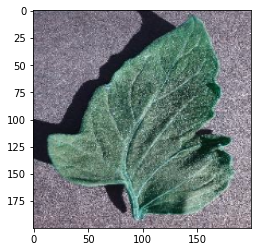

In [8]:
plt.imshow(X[1])

In [9]:
X=X/255

In [14]:
Y

array([2, 0, 8, ..., 2, 5, 7])

In [9]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,AvgPool2D
import tensorflow as tf

In [16]:
from keras.applications.resnet import ResNet50
from keras.models import Model
from keras.layers import Dense, Lambda, Flatten, Input
from keras.preprocessing  import image
from keras.models import Sequential
import glob
import keras

In [10]:
image_size= [200 , 200]

In [18]:
rnet = ResNet50(input_shape = image_size +[3], weights = 'imagenet' ,  include_top = False)
rnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 50, 50, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 50, 50, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 50, 50, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 50, 50, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 25, 25, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 25, 25, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 25, 25, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 13, 13, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 13, 13, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 13, 13, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 13, 13, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 13, 13, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 13, 13, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [19]:
for layer in rnet.layers:        
    layer.trainable = False

In [20]:
x = Flatten()(rnet.output)


In [21]:
prediction = Dense(10 , activation = 'softmax')(x)

In [22]:
model = Model(inputs=rnet.input,outputs=prediction)

In [26]:
X_train=X[0:12800]
Y_train=Y[0:12800]

X_test=X[12800::]
Y_test=Y[12800::]

In [23]:
X.shape

(16011, 200, 200, 3)

In [27]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' ,metrics=['accuracy'])

In [28]:
model.fit(X_train , Y_train , batch_size=256,epochs = 10 , validation_split = 0.2)

Epoch 1/10
40/40 [==============================] - 796s 20s/step - loss: 12.1370 - accuracy: 0.1506 - val_loss: 2.6902 - val_accuracy: 0.2270
Epoch 2/10
40/40 [==============================] - 569s 14s/step - loss: 2.4843 - accuracy: 0.3255 - val_loss: 1.6967 - val_accuracy: 0.4664
Epoch 3/10
40/40 [==============================] - 347s 9s/step - loss: 1.5905 - accuracy: 0.4671 - val_loss: 1.5983 - val_accuracy: 0.4379
Epoch 4/10
40/40 [==============================] - 349s 9s/step - loss: 1.4659 - accuracy: 0.5170 - val_loss: 1.4276 - val_accuracy: 0.5184
Epoch 5/10
40/40 [==============================] - 343s 9s/step - loss: 1.3954 - accuracy: 0.5512 - val_loss: 1.3709 - val_accuracy: 0.5312
Epoch 6/10
40/40 [==============================] - 345s 9s/step - loss: 1.3306 - accuracy: 0.5721 - val_loss: 1.3362 - val_accuracy: 0.5715
Epoch 7/10
40/40 [==============================] - 346s 9s/step - loss: 1.2882 - accuracy: 0.5753 - val_loss: 1.3517 - val_accuracy: 0.5246
Epoch 8/10

In [29]:
pred=model.predict(X_test)

101/101 [==============================] - 91s 887ms/step


In [30]:
from sklearn.metrics import confusion_matrix , accuracy_score
pred_classes=np.argmax(pred,axis=1)

In [35]:
Y_test

array([8, 9, 2, ..., 2, 5, 7])

In [36]:
confusion_matrix(pred_classes,Y_test)

array([[172,   1,   4,   2,  27,  40,   7,  30,  46,   6],
       [  0,   5,   0,   0,   0,   0,   0,   1,   0,   0],
       [ 33,  44, 608, 106,  86, 135,  73,  76,  47,   3],
       [ 13,   0,  21, 327,  27,  25,  18,  36,   4,   5],
       [  0,   0,   1,   0,  21,   5,   1,   6,   0,   0],
       [  1,   0,   0,   0,   9,  96,   4,  10,   1,   1],
       [  0,   1,   0,   0,   1,   5,  41,   3,   0,   0],
       [  7,   7,   1,   2,  28,  55,  31, 157,   3,   2],
       [ 35,   9,   5,   0,   7,   6,   5,  13, 221,   4],
       [ 34,   5,   1,   0,   8,  11,  13,  23,  12, 271]], dtype=int64)

In [37]:
accuracy_score(pred_classes,Y_test)

0.5976331360946746

# vgg16

In [18]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Lambda, Flatten, Input
from keras.preprocessing  import image
from keras.models import Sequential
import glob
import keras

In [19]:
vgg = VGG16(input_shape = image_size +[3], weights = 'imagenet' ,  include_top = False)
vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [20]:
for layer in vgg.layers:        
    layer.trainable = False

In [21]:
x = Flatten()(vgg.output)

In [22]:
prediction = Dense(10 , activation = 'softmax')(x)

In [23]:
model = Model(inputs=vgg.input, outputs =prediction)

In [24]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' ,metrics=['accuracy'])

In [27]:
model.fit(X_train , Y_train , epochs = 5 ,batch_size=128, validation_split = 0.2)

Epoch 1/5
80/80 [==============================] - 6440s 81s/step - loss: 0.8776 - accuracy: 0.7261 - val_loss: 0.5263 - val_accuracy: 0.8336
Epoch 2/5
80/80 [==============================] - 3332s 42s/step - loss: 0.3792 - accuracy: 0.8835 - val_loss: 0.3897 - val_accuracy: 0.8707
Epoch 3/5
80/80 [==============================] - 3478s 44s/step - loss: 0.2409 - accuracy: 0.9359 - val_loss: 0.3517 - val_accuracy: 0.8859
Epoch 4/5
80/80 [==============================] - 3960s 50s/step - loss: 0.1792 - accuracy: 0.9599 - val_loss: 0.3395 - val_accuracy: 0.8832
Epoch 5/5
80/80 [==============================] - 4784s 59s/step - loss: 0.1443 - accuracy: 0.9706 - val_loss: 0.3036 - val_accuracy: 0.9082


In [29]:
pred=model.predict(X_test)

101/101 [==============================] - 753s 7s/step


In [30]:
from sklearn.metrics import confusion_matrix , accuracy_score
pred_classes=np.argmax(pred,axis=1)

In [31]:
confusion_matrix(pred_classes,Y_test)

array([[213,   0,   0,   0,   6,   2,   2,   0,  16,   4],
       [  0,  64,   3,   0,   2,   0,   1,   0,   4,   0],
       [  3,   1, 601,   3,   7,   0,   0,   1,   2,   0],
       [ 10,   0,   8, 443,  10,   3,   2,   8,   0,   0],
       [  3,   0,   1,   3, 113,  14,   1,   3,   3,   0],
       [  4,   0,   2,   2,  35, 333,   5,  12,   2,   0],
       [  1,   2,   1,   2,   9,   7, 167,   3,   0,   0],
       [ 11,   1,   2,   3,  18,   7,  13, 318,   2,   1],
       [ 18,   0,   2,   0,   2,   1,   4,   3, 313,   1],
       [  7,   0,   0,   0,   4,   1,   0,   1,   3, 328]], dtype=int64)

In [32]:
accuracy_score(pred_classes,Y_test)

0.9009654313298038

In [33]:
model.save('Tomato_disease_detection.h5')

In [34]:
pwd

'C:\\Users\\Ak7shy\\CNN'

In [34]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


In [35]:
# Load the pre-trained CNN model for tomato disease detection
model = load_model('Tomato_disease_detection.h5')

# Define class labels
class_labels = ['Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite','Tomato_healthy']  # Replace with your actual class names


In [36]:
# Set up OpenCV to capture live video from the webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default webcam, change to the appropriate camera index if you have multiple cameras

    

In [37]:
cap = cv2.VideoCapture(0) 
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess the live video frame to match the input format expected by the CNN model
    # (resize, normalization, etc.)
    # Replace the preprocessing steps below with your specific preprocessing logic
    
    # Example preprocessing steps:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    frame = cv2.resize(frame, (200, 200))  # Resize to match the input size of the model
    frame = frame.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension

    # Use the loaded model to predict the disease class for the frame
    predictions = model.predict(frame)
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the live video feed along with the predicted disease class label
    cv2.putText(frame, f'Disease: {predicted_class_label}', (75, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.imshow('Video', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()        


1/1 [==============================] - 0s 122ms/step


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:124: error: (-215:Assertion failed) bmi && width >= 0 && height >= 0 && (bpp == 8 || bpp == 24 || bpp == 32) in function 'FillBitmapInfo'


In [33]:
# Release the video capture and close the OpenCV window
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
import tensorflow as tf

# Define the classes for the Tomato Disease Detection model
classes = ['Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite','Tomato_healthy']  # Replace with your actual class names


# Load the pre-trained CNN model (update the model path accordingly)
model_path = 'Tomato_disease_detection.h5'
model = tf.keras.models.load_model(model_path)

# Function to preprocess the live image data for the model
def preprocess_image(image):
    # Preprocess the image based on your model's requirements
    # For example, resize the image and convert it to a numpy array
    resized_image = cv2.resize(image, (200, 200))
    preprocessed_image = np.expand_dims(resized_image, axis=0)
    return preprocessed_image

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the live image
    preprocessed_frame = preprocess_image(frame)

    # Perform inference on the preprocessed image
    predictions = model.predict(preprocessed_frame)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = classes[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]

    # Add the prediction label to the frame
    cv2.putText(frame, f"{predicted_class} ({confidence:.2f})", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the live image stream
    cv2.imshow('Tomato Disease Detection', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 76ms/step
